<a href="https://colab.research.google.com/github/DebershiMitra/SCALER-DATASCIENCE/blob/main/YULU_HYPOTHESIS_TESTING_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Business Case: Yulu - Hypothesis Testing
About Yulu
Yulu is India’s leading *micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.*

*Yulu zones* are located at all the appropriate locations (including *metro stations, bus stands, office spaces, residential areas, corporate offices, etc*) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want *to understand the factors affecting the demand for these shared electric cycles in the Indian market*.

Problem Statement
The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

How well those variables describe the electric cycle demands



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as spy

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

In [3]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


shape of the dataset

In [4]:
df.shape

(10886, 12)

columns in the dataset

In [5]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

Basic information about the values present in the dataset

In [6]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


Column Profiling:


datetime: datetime

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
weather:
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered








Is there any null value in the dataset ?


In [8]:
np.any(df.isna())

False

Is there any duplicated values in the dataset ?


In [9]:
np.any(df.duplicated())

False

Datatype of the columns

In [10]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

Converting the datatype of datetime column from object to datetime

In [11]:
df['datetime'] = pd.to_datetime(df['datetime'])

What is the time period for which the data is given ?

In [12]:
df['datetime'].min()

Timestamp('2011-01-01 00:00:00')

In [13]:
df['datetime'].max()

Timestamp('2012-12-19 23:00:00')

In [14]:
df['datetime'].max() - df['datetime'].min()

Timedelta('718 days 23:00:00')

In [15]:
df['day'] = df['datetime'].dt.day_name()

In [16]:
# setting the 'datetime' column as the index of the DataFrame 'df'
df.set_index('datetime', inplace = True)

# By setting the 'datetime' column as the index, it allows for easier and more efficient access,
    # filtering, and manipulation of the data based on the datetime values.
# It enables operations such as resampling, slicing by specific time periods, and
    # applying time-based calculations.

In [17]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,Saturday
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,Saturday
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,Saturday
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,Saturday
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,Wednesday
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Wednesday
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Wednesday


Slicing Data by Time

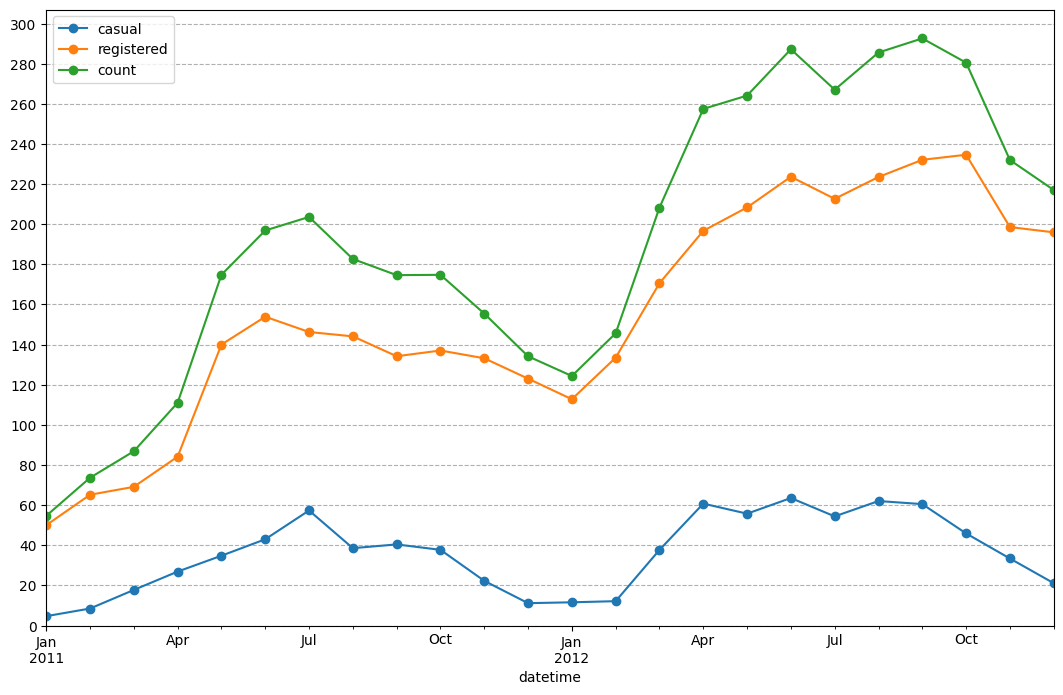

In [19]:
# The below code visualizes the trend of the monthly average values for the 'casual', 'registered',
    # and 'count' variables,  allowing for easy comparison and analysis of their patterns over time

plt.figure(figsize = (13, 8))

# plotting a lineplot by resampling the data on a monthly basis, and calculating the mean value
    # of 'casual', 'registered' and 'count' users for each month
df.resample('M')['casual'].mean().plot(kind = 'line', legend = 'casual', marker = 'o')
df.resample('M')['registered'].mean().plot(kind = 'line', legend = 'registered', marker = 'o')
df.resample('M')['count'].mean().plot(kind = 'line', legend = 'count', marker = 'o')

plt.grid(axis = 'y', linestyle = '--')    # adding gridlines only along the y-axis
plt.yticks(np.arange(0, 301, 20))
plt.ylim(0,)    # setting the lower y-axis limit to 0
plt.show()      # displaying the plot

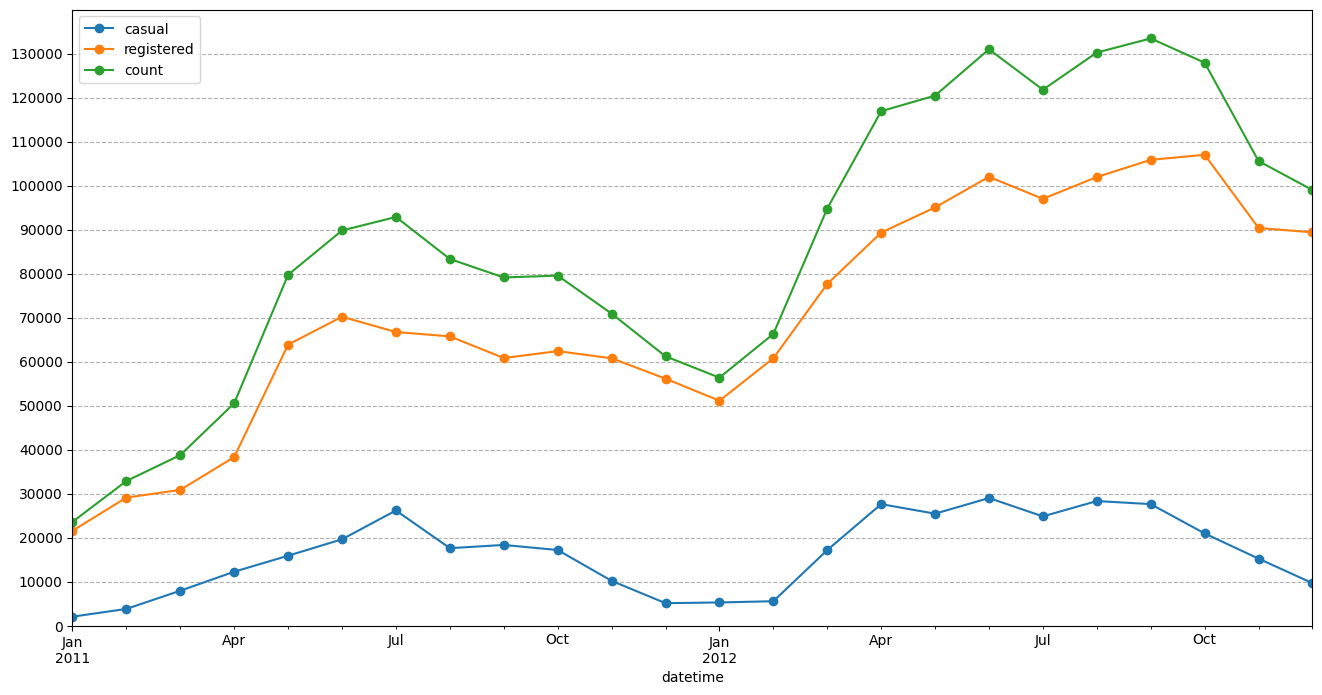

In [20]:
# The below code visualizes the trend of the monthly total values for the 'casual', 'registered',
    # and 'count' variables,  allowing for easy comparison and analysis of their patterns over time

plt.figure(figsize = (16, 8))

# plotting a lineplot by resampling the data on a monthly basis, and calculating the sum
    # of 'casual', 'registered' and 'count' users for each month
df.resample('M')['casual'].sum().plot(kind = 'line', legend = 'casual', marker = 'o')
df.resample('M')['registered'].sum().plot(kind = 'line', legend = 'registered', marker = 'o')
df.resample('M')['count'].sum().plot(kind = 'line', legend = 'count', marker = 'o')

plt.grid(axis = 'y', linestyle = '--')      # adding gridlines only along the y-axis
plt.yticks(np.arange(0, 130001, 10000))
plt.ylim(0,)        # setting the lower y-axis limit to 0
plt.show()          # displaying the plot

I want to know if there is an increase in the average hourly count of rental bikes from the year 2011 to 2012

In [21]:
# resampling the DataFrame by the year
df1 = df.resample('Y')['count'].mean().to_frame().reset_index()

# Create a new column 'prev_count' by shifting the 'count' column one position up
    # to compare the previous year's count with the current year's count
df1['prev_count'] = df1['count'].shift(1)

# Calculating the growth percentage of 'count' with respect to the 'count' of previous year
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1

,datetime,count,prev_count,growth_percent
0,2011-12-31,144.223349,NaN,NaN
1,2012-12-31,238.560944,144.223349,65.410764


This data suggests that there was substantial growth in the count of the variable over the course of one year.

The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.

It indicates positive growth and potentially a successful outcome or increasing demand for the variable being measured.

In [22]:
df.reset_index(inplace = True)

How does the average hourly count of rental bikes varies for different month ?

In [23]:
# Grouping the DataFrame by the month
df1 = df.groupby(by = df['datetime'].dt.month)['count'].mean().reset_index()
df1.rename(columns = {'datetime' : 'month'}, inplace = True)

# Create a new column 'prev_count' by shifting the 'count' column one position up
    # to compare the previous month's count with the current month's count
df1['prev_count'] = df1['count'].shift(1)

# Calculating the growth percentage of 'count' with respect to the 'count' of previous month
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1.set_index('month', inplace = True)
df1

,count,prev_count,growth_percent
month,,,
1,90.366516,NaN,NaN
2,110.003330,90.366516,21.730188
3,148.169811,110.003330,34.695751
4,184.160616,148.169811,24.290241
5,219.459430,184.160616,19.167406
6,242.031798,219.459430,10.285440
7,235.325658,242.031798,-2.770768
8,234.118421,235.325658,-0.513007
9,233.805281,234.118421,-0.133753


The count of rental bikes shows an increasing trend from January to March, with a significant growth rate of 34.70% between February and March.

The growth rate starts to stabilize from April to June, with a relatively smaller growth rate.

From July to September, there is a slight decrease in the count of rental bikes, with negative growth rates.

The count further declines from October to December, with the largest drop observed between October and November (-14.94%).

[]

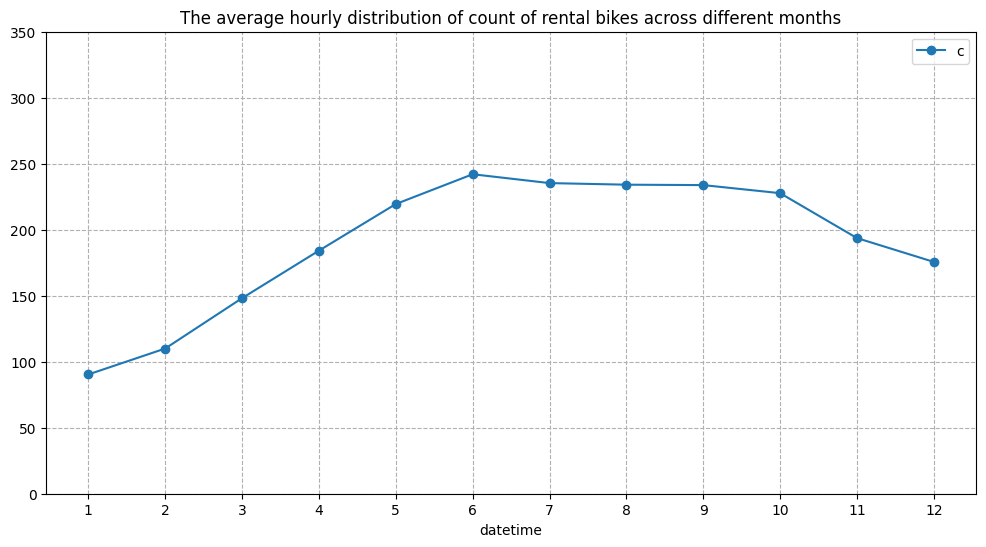

In [24]:
# The resulting plot visualizes the average hourly distribution of the count of rental bikes for each
    # month, allowing for comparison and identification of any patterns or trends throughout the year.

# Setting the figure size for the plot
plt.figure(figsize = (12, 6))

# Setting the title for the plot
plt.title("The average hourly distribution of count of rental bikes across different months")

# Grouping the DataFrame by the month and calculating the mean of the 'count' column for each month.
    # Ploting the line graph using markers ('o') to represent the average count per month.
df.groupby(by = df['datetime'].dt.month)['count'].mean().plot(kind = 'line', marker = 'o')

plt.ylim(0,)    # Setting the y-axis limits to start from zero
plt.xticks(np.arange(1, 13))   # Setting the x-ticks to represent the months from 1 to 12
plt.legend('count')    # Adding a legend to the plot for the 'count' line.
plt.yticks(np.arange(0, 400, 50))
# Adding gridlines to both the x and y axes with a dashed line style
plt.grid(axis = 'both', linestyle = '--')
plt.plot()     # Displaing the plot.

The average hourly count of rental bikes is the highest in the month of June followed by July and August.

The average hourly count of rental bikes is the lowest in the month of January followed by February and March.

Overall, these trends suggest a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months. It could be useful for the rental bike company to consider these patterns for resource allocation, marketing strategies, and operational planning throughout the year.

What is the distribution of average count of rental bikes on an hourly basis in a single day ?

In [25]:
# Grouping the DataFrame by the hour
df1 = df.groupby(by = df['datetime'].dt.hour)['count'].mean().reset_index()
df1.rename(columns = {'datetime' : 'hour'}, inplace = True)

# Create a new column 'prev_count' by shifting the 'count' column one position up
    # to compare the previous hour's count with the current hour's count
df1['prev_count'] = df1['count'].shift(1)

# Calculating the growth percentage of 'count' with respect to the 'count' of previous hour
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1.set_index('hour', inplace = True)
df1

,count,prev_count,growth_percent
hour,,,
0,55.138462,NaN,NaN
1,33.859031,55.138462,-38.592718
2,22.899554,33.859031,-32.367959
3,11.757506,22.899554,-48.656179
4,6.407240,11.757506,-45.505110
5,19.767699,6.407240,208.521293
6,76.259341,19.767699,285.777526
7,213.116484,76.259341,179.462793
8,362.769231,213.116484,70.221104


During the early morning hours (hours 0 to 5), there is a significant decrease in the count, with negative growth percentages ranging from -38.59% to -48.66%.

However, starting from hour 5, there is a sudden increase in count, with a sharp positive growth percentage of 208.52% observed from hour 4 to hour 5.

The count continues to rise significantly until reaching its peak at hour 17, with a growth percentage of 48.17% compared to the previous hour.

After hour 17, there is a gradual decrease in count, with negative growth percentages ranging from -8.08% to -32.99% during the late evening and nighttime hours.

[]

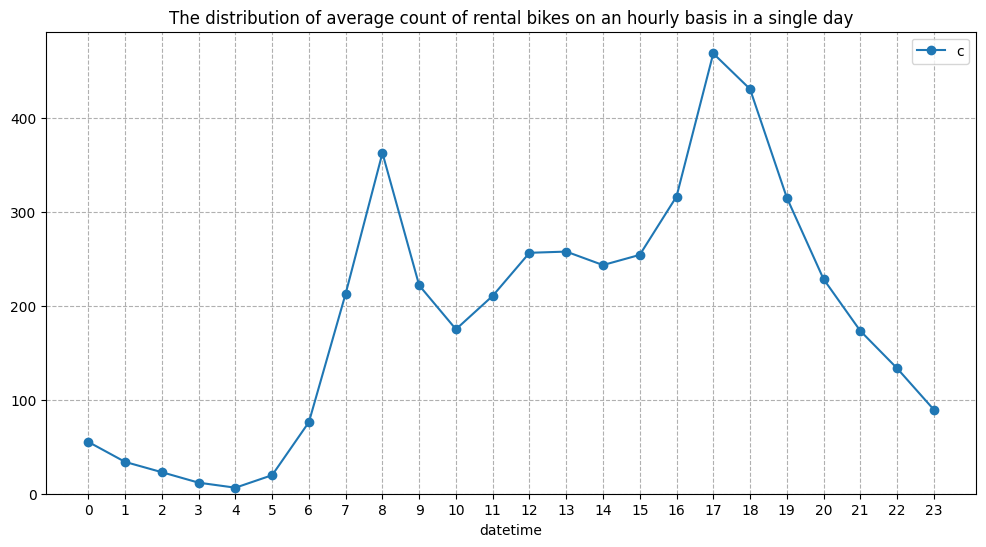

In [26]:
plt.figure(figsize = (12, 6))
plt.title("The distribution of average count of rental bikes on an hourly basis in a single day")
df.groupby(by = df['datetime'].dt.hour)['count'].mean().plot(kind = 'line', marker = 'o')
plt.ylim(0,)
plt.xticks(np.arange(0, 24))
plt.legend('count')
plt.grid(axis = 'both', linestyle = '--')
plt.plot()

The average count of rental bikes is the highest at 5 PM followed by 6 PM and 8 AM of the day.

The average count of rental bikes is the lowest at 4 AM followed by 3 AM and 5 AM of the day.

These patterns indicate that there is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.

Basic Information about the Dataset

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  day         10886 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(8), object(1)
memory usage: 1.1+ MB


Basic Description of the dataset

In [28]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


These statistics provide insights into the central tendency, spread, and range of the numerical features in the dataset.

In [29]:
np.round(df['season'].value_counts(normalize = True) * 100, 2)

4    25.11
2    25.11
3    25.11
1    24.67
Name: season, dtype: float64

In [30]:
np.round(df['holiday'].value_counts(normalize = True) * 100, 2)

0    97.14
1     2.86
Name: holiday, dtype: float64

In [31]:
np.round(df['workingday'].value_counts(normalize = True) * 100, 2)

1    68.09
0    31.91
Name: workingday, dtype: float64

In [32]:
np.round(df['workingday'].value_counts(normalize = True) * 100, 2)

1    68.09
0    31.91
Name: workingday, dtype: float64

In [33]:
np.round(df['weather'].value_counts(normalize = True) * 100, 2)


1    66.07
2    26.03
3     7.89
4     0.01
Name: weather, dtype: float64

[]

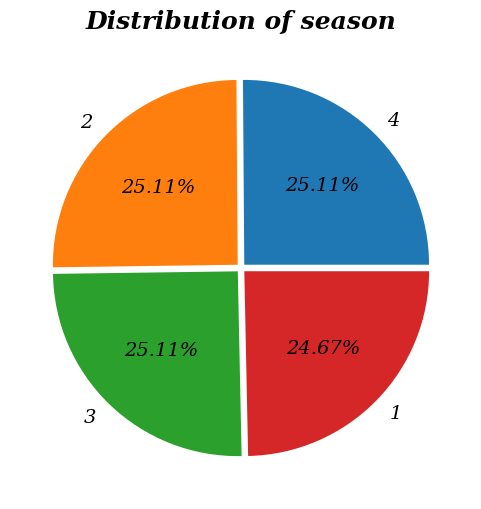

In [34]:
# The below code generates a visually appealing pie chart to showcase the
    # distribution of seasons in the dataset

plt.figure(figsize = (6, 6))      # setting the figure size to 6*6

# setting the title of the plot
plt.title('Distribution of season', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})

df_season = np.round(df['season'].value_counts(normalize = True) * 100, 2).to_frame()

# Creating the pie-chart
plt.pie(x = df_season['season'],
        explode = [0.025, 0.025, 0.025, 0.025],
        labels = df_season.index,
        autopct = '%.2f%%',
        textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})

plt.plot()     # displaying the plot

[]

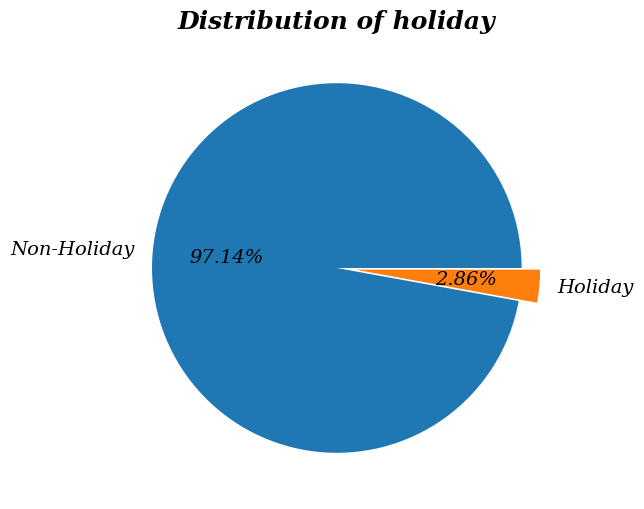

In [35]:
# The below code generates a visually appealing pie chart to showcase the
    # distribution of holiday in the dataset

plt.figure(figsize = (6, 6))     # setting the figure size to 6*6

# setting the title of the plot
plt.title('Distribution of holiday', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})

df_holiday = np.round(df['holiday'].value_counts(normalize = True) * 100, 2).to_frame()

# Creating the pie-chart
plt.pie(x = df_holiday['holiday'],
        explode = [0, 0.1],
        labels = ['Non-Holiday', 'Holiday'],
        autopct = '%.2f%%',
        textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})

plt.plot()        # displaying the plot

[]

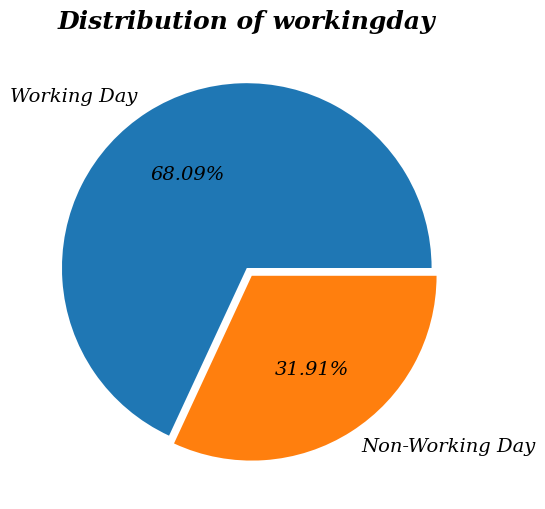

In [36]:
# The below code generates a visually appealing pie chart to showcase the
    # distribution of workingday in the dataset

plt.figure(figsize = (6, 6))    # setting the figure size to 6*6

# setting the title of the plot
plt.title('Distribution of workingday', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})

df_workingday = np.round(df['workingday'].value_counts(normalize = True) * 100, 2).to_frame()

# Creating the pie-chart
plt.pie(x = df_workingday['workingday'],
        explode = [0, 0.05],
        labels = ['Working Day', 'Non-Working Day'],
        autopct = '%.2f%%',
        textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})

plt.plot()         # displaying the plot

[]

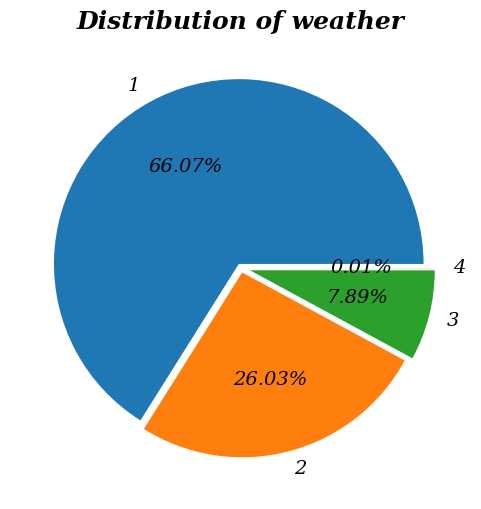

In [37]:
# The below code generates a visually appealing pie chart to showcase the
    # distribution of weather in the dataset

plt.figure(figsize = (6, 6))     # setting the figure size to 6*6

# setting the title of the plot
plt.title('Distribution of weather', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})

df_weather = np.round(df['weather'].value_counts(normalize = True) * 100, 2).to_frame()

# Creating the pie-chart
plt.pie(x = df_weather['weather'],
        explode = [0.025, 0.025, 0.05, 0.05],
        labels = df_weather.index,
        autopct = '%.2f%%',
        textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})

plt.plot()        # displaying the plot

Univariate Analysis

[]

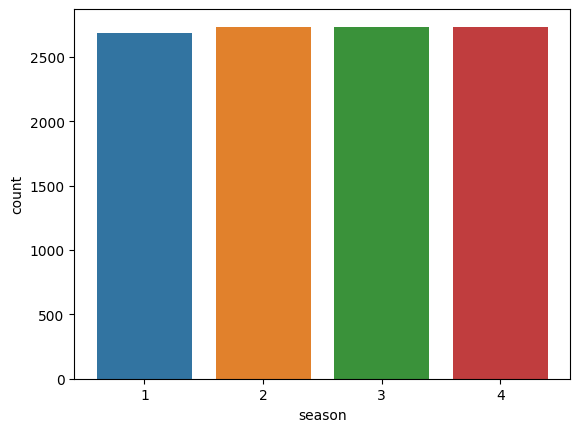

In [38]:
# The below code generates a visually appealing count plot to showcase the
    # distribution of season in the dataset
sns.countplot(data = df, x = 'season')
plt.plot()   # displaying the plot

[]

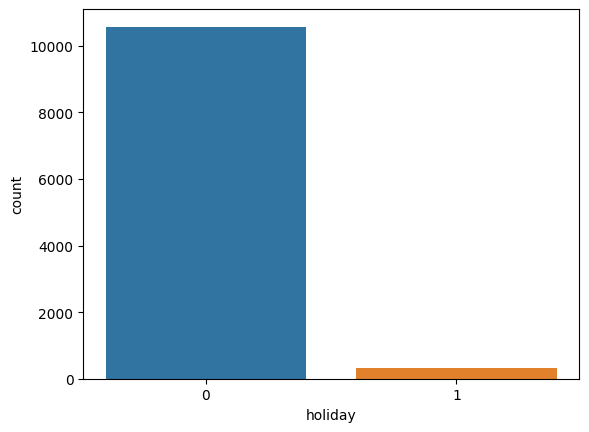

In [39]:
# The below code generates a visually appealing count plot to showcase the
    # distribution of holiday in the dataset

sns.countplot(data = df, x = 'holiday')
plt.plot()       # displaying the chart

[]

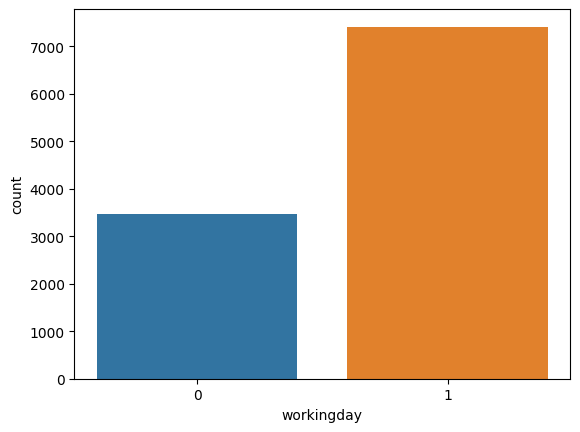

In [40]:
# The below code generates a visually appealing count plot to showcase the
    # distribution of workingday in the dataset

sns.countplot(data = df, x = 'workingday')
plt.plot()      # displaying the chart

[]

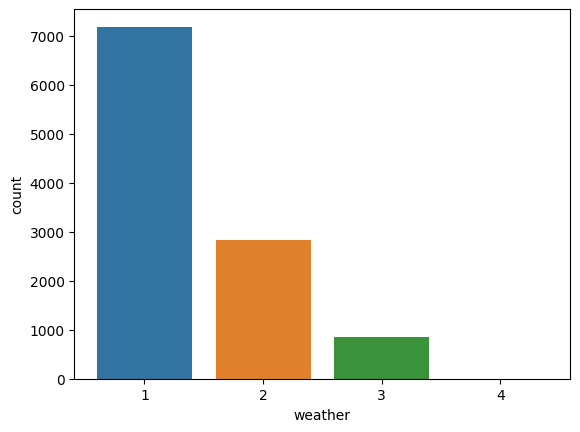

In [41]:
# The below code generates a visually appealing count plot to showcase the
    # distribution of weather in the dataset

sns.countplot(data = df, x = 'weather')
plt.plot()        # displaying the chart

[]

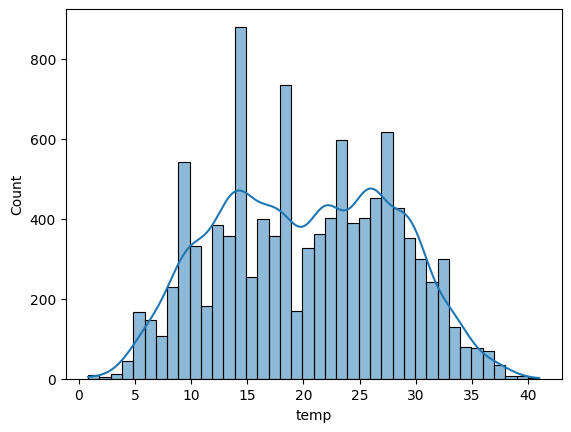

In [42]:
# The below code generates a histogram plot for the 'temp' feature, showing the distribution of
    # temperature values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

sns.histplot(data = df, x = 'temp', kde = True, bins = 40)
plt.plot()        # displaying the chart

In [43]:
temp_mean = np.round(df['temp'].mean(), 2)
temp_std = np.round(df['temp'].std(), 2)
temp_mean, temp_std

(20.23, 7.79)

The mean and the standard deviation of the temp column is 20.23 and 7.79 degree celcius respectively.

[]

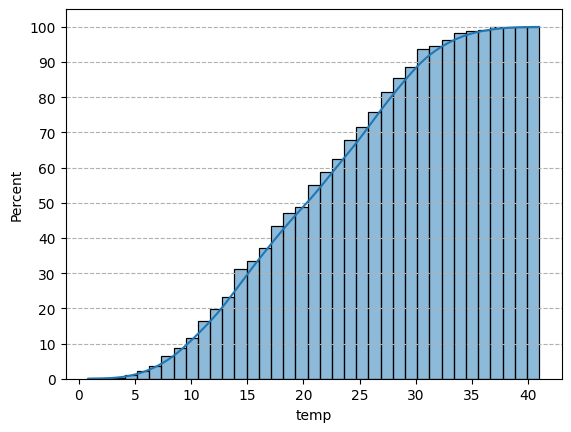

In [44]:
# The below code generates a histogram plot for the 'temp' feature, showing the cumulative
    # distribution of temperature values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

sns.histplot(data = df, x = 'temp', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()          # displaying the chart

More than 80 % of the time, the temperature is less than 28 degrees celcius.

[]

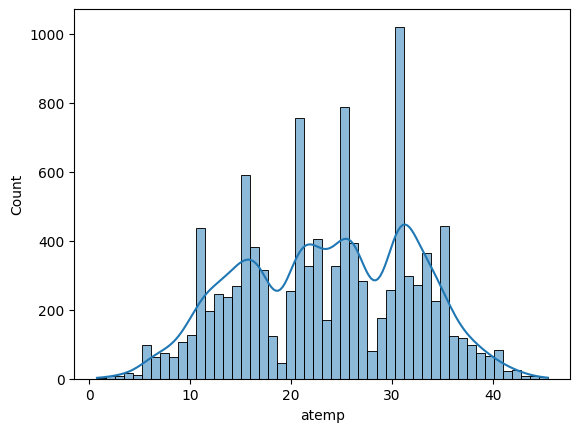

In [45]:
# The below code generates a histogram plot for the 'atemp' feature, showing the distribution of
    # feeling temperature values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

sns.histplot(data = df, x = 'atemp', kde = True, bins = 50)
plt.plot()         # displaying the chart

In [46]:
temp_mean = np.round(df['atemp'].mean(), 2)
temp_std = np.round(df['atemp'].std(), 2)
temp_mean, temp_std

(23.66, 8.47)

The mean and the standard deviation of the atemp column is 23.66 and 8.47 degree celcius respectively.

[]

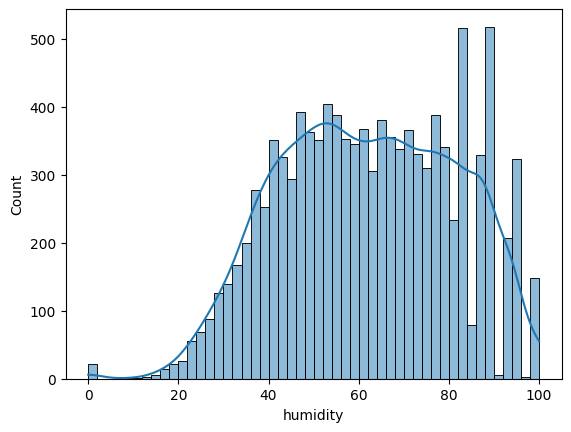

In [47]:
# The below code generates a histogram plot for the 'humidity' feature, showing the distribution of
    # humidity values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

sns.histplot(data = df, x = 'humidity', kde = True, bins = 50)
plt.plot()       # displaying the chart

In [48]:
humidity_mean = np.round(df['humidity'].mean(), 2)
humidity_std = np.round(df['humidity'].std(), 2)
humidity_mean, humidity_std

(61.89, 19.25)

The mean and the standard deviation of the humidity column is 61.89 and 19.25 respectively.

[]

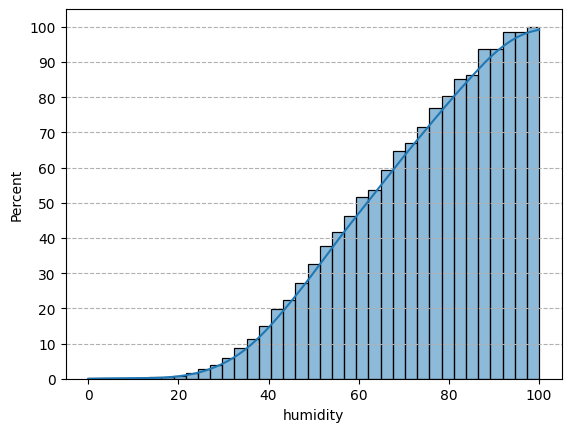

In [49]:
# The below code generates a histogram plot for the 'humidity' feature, showing the cumulative
    # distribution of humidity values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

sns.histplot(data = df, x = 'humidity', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')    # setting the gridlines along y axis
plt.yticks(np.arange(0, 101, 10))
plt.plot()       # displaying the chart

More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.

[]

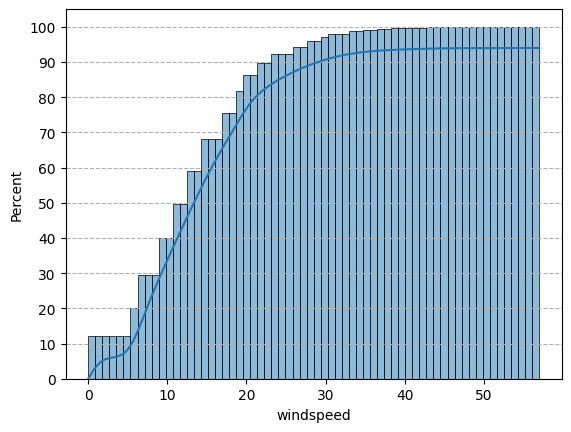

In [50]:
sns.histplot(data = df, x = 'windspeed', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()       # displaying the chart

More than 85 % of the total windspeed data has a value of less than 20.

In [51]:
len(df[df['windspeed'] < 20]) / len(df)

0.8626676465184641

[]

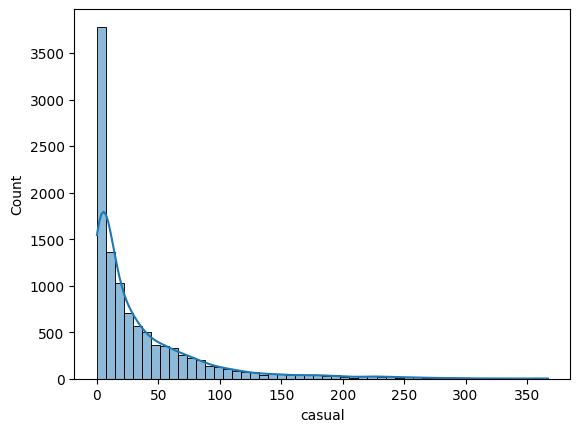

In [52]:
# The below code generates a histogram plot for the 'casual' feature, showing the distribution of
    # casual users' values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

sns.histplot(data = df, x = 'casual', kde = True, bins = 50)
plt.plot()      # displaying the chart

[]

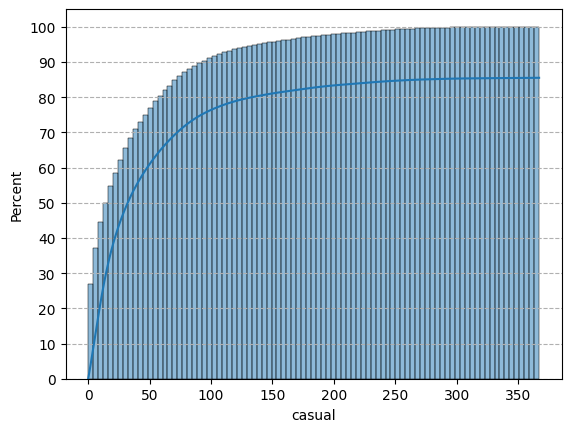

In [53]:
sns.histplot(data = df, x = 'casual', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()        # displaying the chart


More than 80 % of the time, the count of casual users is less than 60.

[]

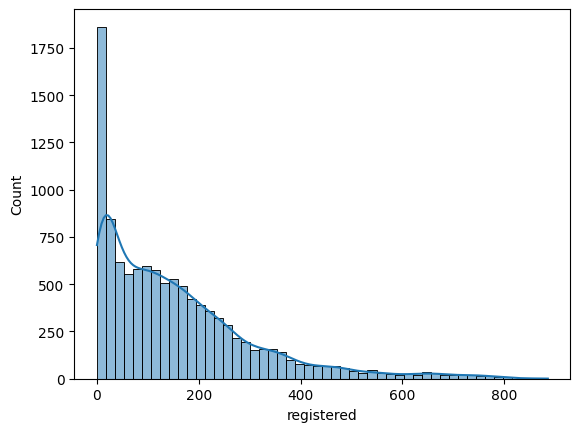

In [54]:
# The below code generates a histogram plot for the 'registered' feature, showing the distribution of
    # registered users' values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

sns.histplot(data = df, x = 'registered', kde = True, bins = 50)
plt.plot()          # displaying the chart

[]

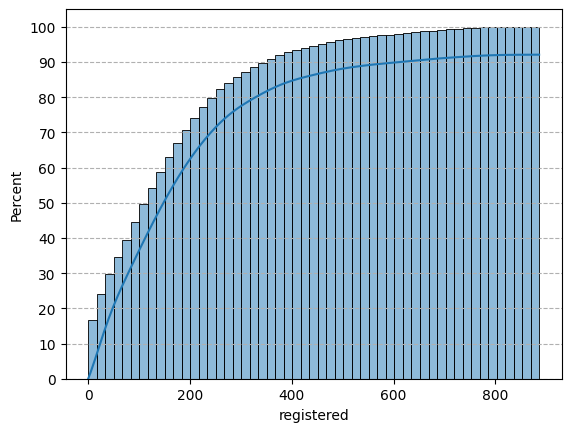

In [55]:
sns.histplot(data = df, x = 'registered', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()        # displaying the chart

More than 85 % of the time, the count of registered users is less than 300.

Outliers Detection

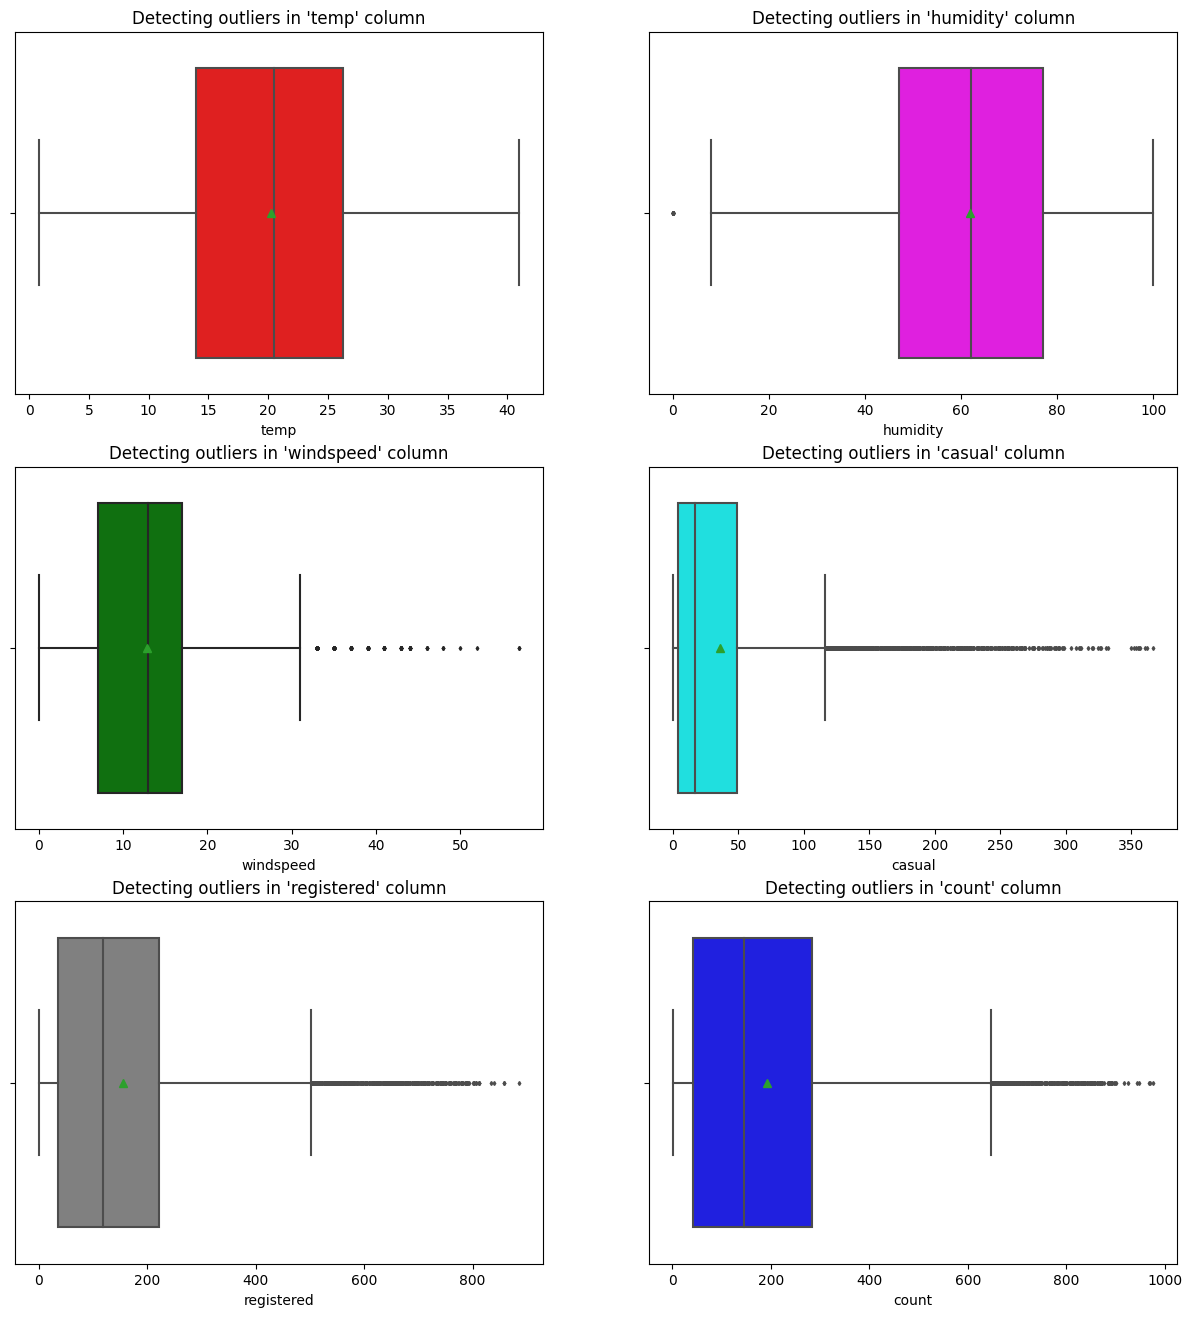

In [56]:
columns = ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
colors = np.random.permutation(['red', 'blue', 'green', 'magenta', 'cyan', 'gray'])
count = 1
plt.figure(figsize = (15, 16))
for i in columns:
    plt.subplot(3, 2, count)
    plt.title(f"Detecting outliers in '{i}' column")
    sns.boxplot(data = df, x = df[i], color = colors[count - 1], showmeans = True, fliersize = 2)
    plt.plot()
    count += 1

There is no outlier in the temp column.

There are few outliers present in humidity column.

There are many outliers present in each of the columns : windspeed, casual, registered, count.

Bivariate Analysis

[]

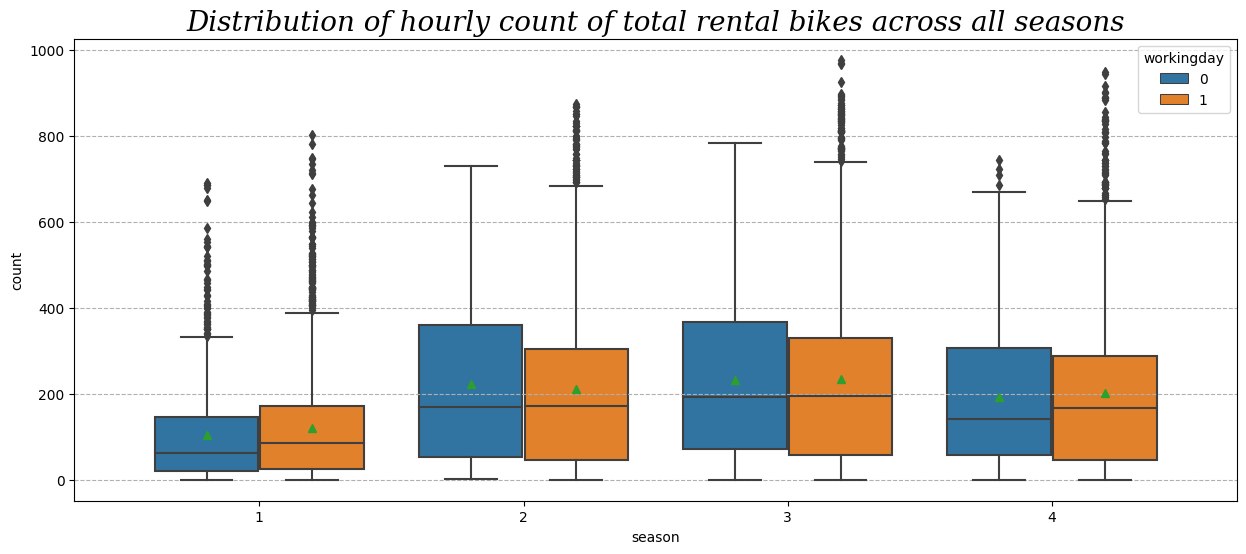

In [57]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all seasons',
         fontdict = {'size' : 20,
                    'style' : 'oblique',
                    'family' : 'serif'})
sns.boxplot(data = df, x = 'season', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

The hourly count of total rental bikes is higher in the fall season, followed by the summer and winter seasons. It is generally low in the spring season.

[]

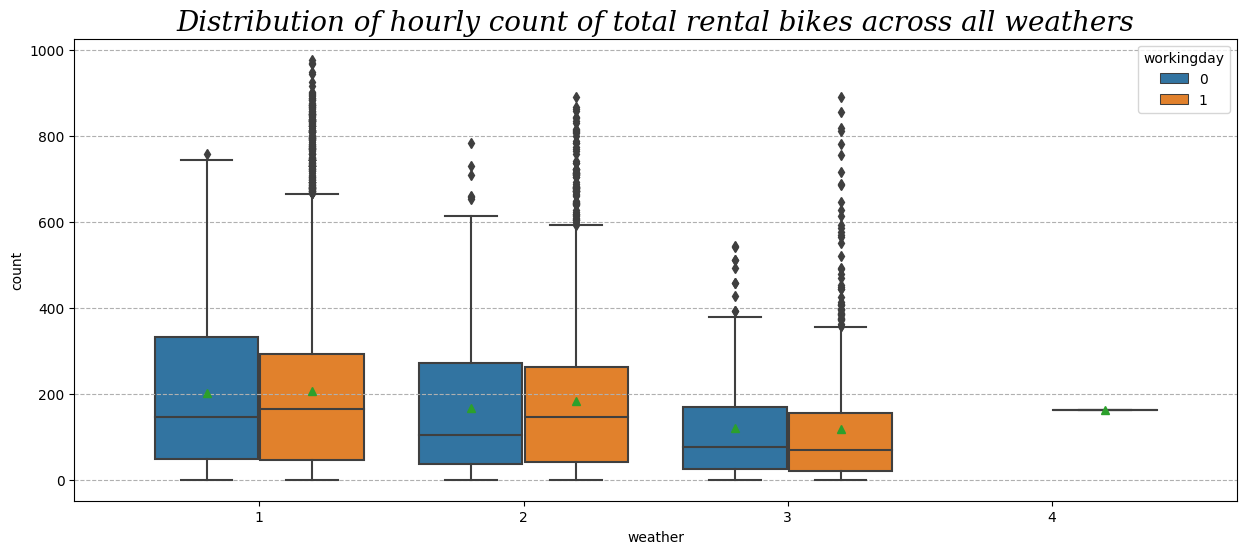

In [58]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all weathers',
         fontdict = {'size' : 20,
                    'style' : 'oblique',
                    'family' : 'serif'})
sns.boxplot(data = df, x = 'weather', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

The hourly count of total rental bikes is higher in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.

Is there any effect of Working Day on the number of electric cycles rented ?

In [59]:
df.groupby(by = 'workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


[]

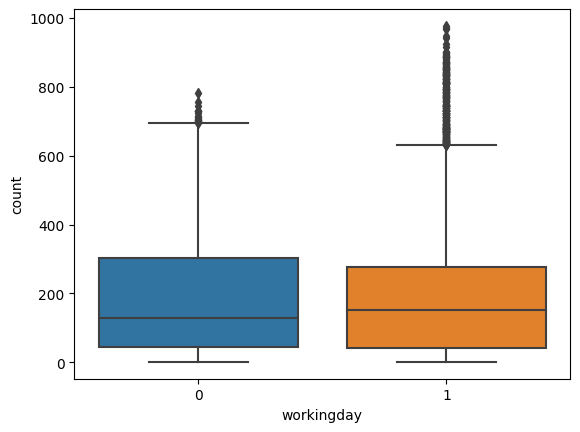

In [60]:
sns.boxplot(data = df, x = 'workingday', y = 'count')
plt.plot()

*STEP-1* : Set up Null Hypothesis

Null Hypothesis ( H0 ) - Working Day does not have any effect on the number of electric cycles rented.

Alternate Hypothesis ( HA ) - Working Day has some effect on the number of electric cycles rented

*STEP-2* : Checking for basic assumpitons for the hypothesis

Distribution check using QQ Plot
Homogeneity of Variances using Levene's test
*STEP-3*: Define Test statistics; Distribution of T under H0.

If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.
*STEP-4*: Compute the p-value and fix value of alpha.

We set our *alpha to be 0.05*
*STEP-5*: Compare p-value and alpha.

Based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0
p-val < alpha : Reject H0
*Visual Tests to know if the samples follow normal distribution*

[]

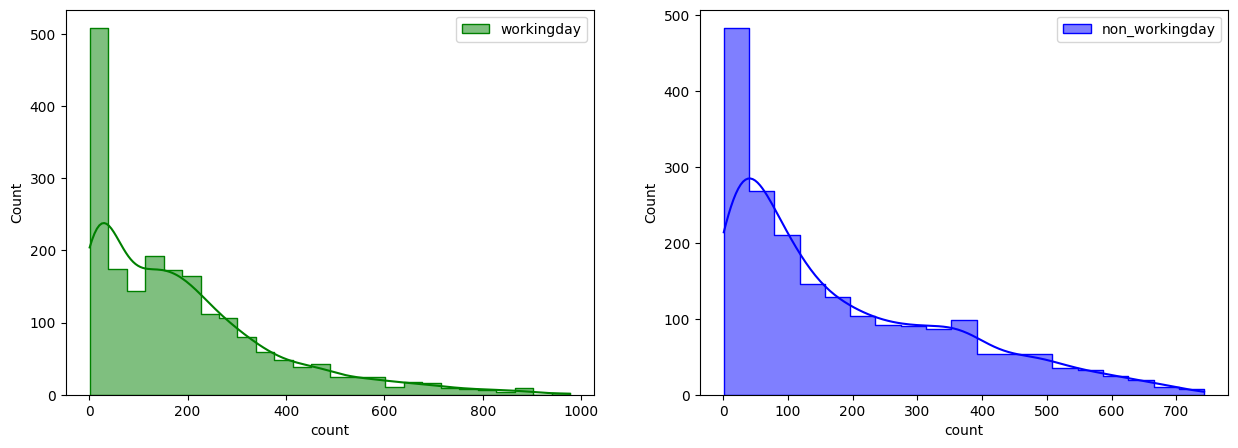

In [65]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.loc[df['workingday'] == 1, 'count'].sample(2000),
             element = 'step', color = 'green', kde = True, label = 'workingday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(df.loc[df['workingday'] == 0, 'count'].sample(2000),
             element = 'step', color = 'blue', kde = True, label = 'non_workingday')
plt.legend()
plt.plot()

It can be inferred from the above plot that the distributions do not follow normal distribution.

Distribution check using QQ Plot*

[]

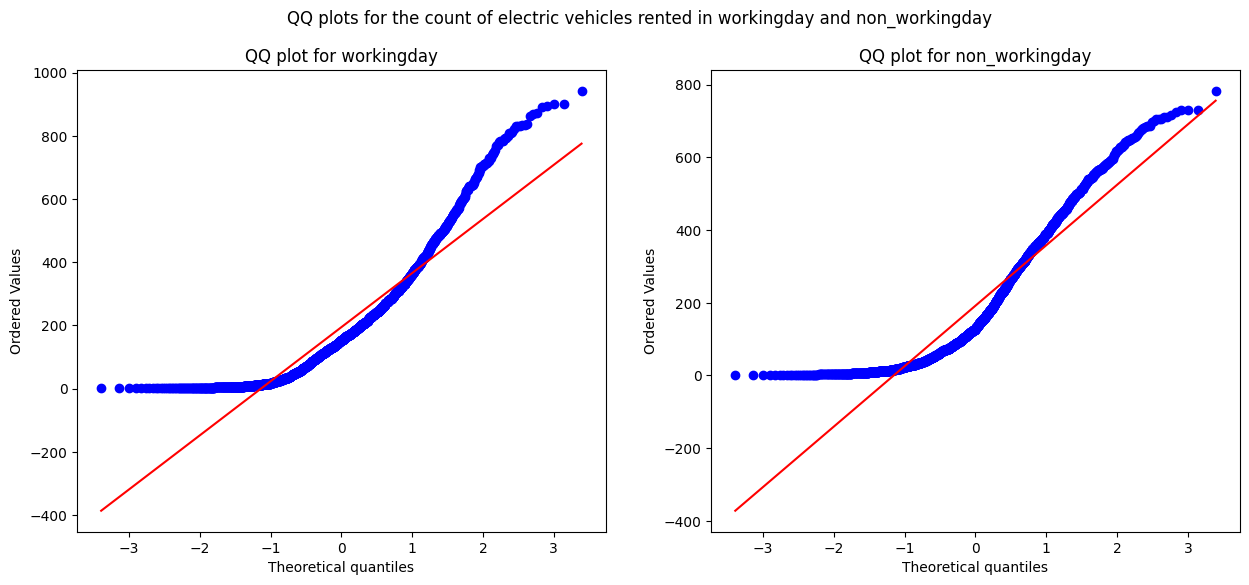

In [66]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in workingday and non_workingday')
spy.probplot(df.loc[df['workingday'] == 1, 'count'].sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for workingday')
plt.subplot(1, 2, 2)
spy.probplot(df.loc[df['workingday'] == 0, 'count'].sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for non_workingday')
plt.plot()

It can be inferred from the above plot that the distributions do not follow normal distribution.

It can be seen from the above plots that the samples do not come from normal distribution.

Applying Shapiro-Wilk test for normality
 : The sample follows normal distribution
 : The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [68]:
test_stat, p_value = spy.shapiro(df.loc[df['workingday'] == 1, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.483805731911131e-38
The sample does not follow normal distribution
p-value 2.4448640399511146e-37
The sample does not follow normal distribution


In [69]:
test_stat, p_value = spy.shapiro(df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 4.462154744791066e-36
The sample does not follow normal distribution


Homogeneity of Variances using Lavene's test

In [70]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df.loc[df['workingday'] == 1, 'count'].sample(2000),
                                df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.23853125967385413
The samples have Homogenous Variance 


Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [71]:
# Ho : Mean no.of electric cycles rented is same for working and non-working days
# Ha : Mean no.of electric cycles rented is not same for working and non-working days
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples

test_stat, p_value = spy.mannwhitneyu(df.loc[df['workingday'] == 1, 'count'],
                                      df.loc[df['workingday'] == 0, 'count'])
print('P-value :',p_value)
if p_value < 0.05:
    print('Mean no.of electric cycles rented is not same for working and non-working days')
else:
    print('Mean no.of electric cycles rented is same for working and non-working days')

P-value : 0.9679139953914079
Mean no.of electric cycles rented is same for working and non-working days


Therefore, the mean hourly count of the total rental bikes is statistically same for both working and non- working days .

Is there any effect of holidays on the number of electric cycles rented ?

In [72]:
df.groupby(by = 'holiday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


[]

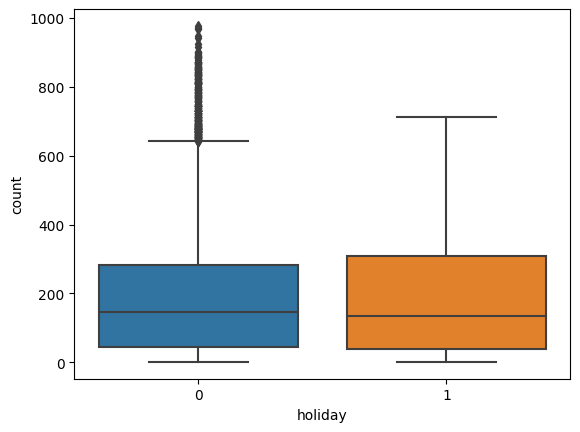

In [73]:
sns.boxplot(data = df, x = 'holiday', y = 'count')
plt.plot()

*STEP-1* : Set up Null Hypothesis

Null Hypothesis ( H0 ) - Holidays have no effect on the number of electric vehicles rented

Alternate Hypothesis ( HA ) - Holidays has some effect on the number of electric vehicles rented

*STEP-2* : Checking for basic assumpitons for the hypothesis

Distribution check using QQ Plot
Homogeneity of Variances using Levene's test
*STEP-3*: Define Test statistics; Distribution of T under H0.

If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.
*STEP-4*: Compute the p-value and fix value of alpha.

We set our *alpha to be 0.05*
*STEP-5*: Compare p-value and alpha.

Based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0
p-val < alpha : Reject H0

[]

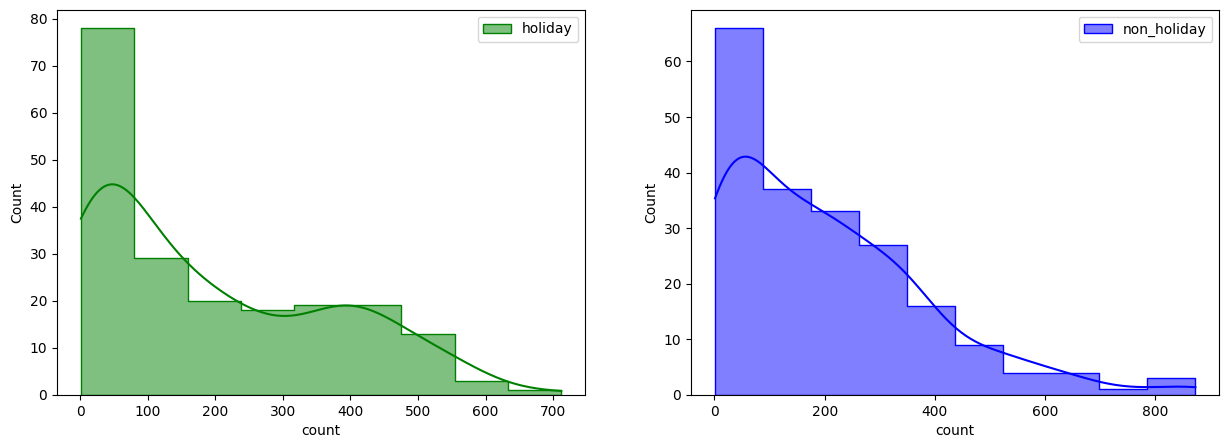

In [74]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.loc[df['holiday'] == 1, 'count'].sample(200),
             element = 'step', color = 'green', kde = True, label = 'holiday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(df.loc[df['holiday'] == 0, 'count'].sample(200),
             element = 'step', color = 'blue', kde = True, label = 'non_holiday')
plt.legend()
plt.plot()

It can be inferred from the above plot that the distributions do not follow normal distribution.

[]

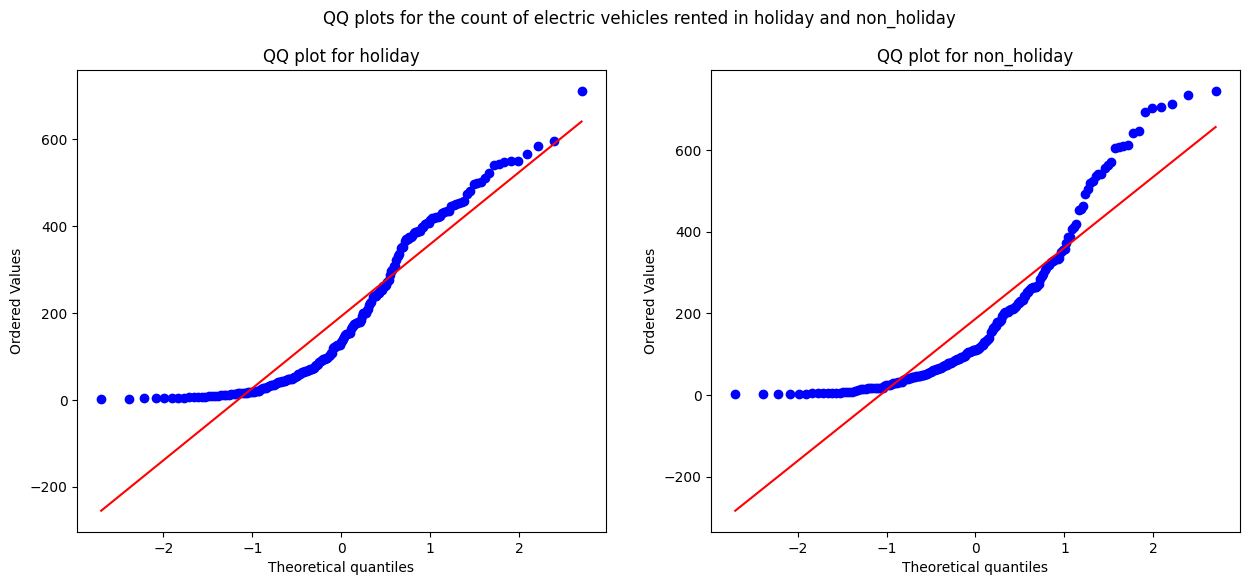

In [75]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in holiday and non_holiday')
spy.probplot(df.loc[df['holiday'] == 1, 'count'].sample(200), plot = plt, dist = 'norm')
plt.title('QQ plot for holiday')
plt.subplot(1, 2, 2)
spy.probplot(df.loc[df['holiday'] == 0, 'count'].sample(200), plot = plt, dist = 'norm')
plt.title('QQ plot for non_holiday')
plt.plot()

It can be inferred from the above plot that the distributions do not follow normal distribution.

It can be seen from the above plots that the samples do not come from normal distribution.

Applying Shapiro-Wilk test for normality
 : The sample follows normal distribution
 : The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [76]:
test_stat, p_value = spy.shapiro(df.loc[df['holiday'] == 1, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.1441229214037563e-10
The sample does not follow normal distribution


In [77]:
test_stat, p_value = spy.shapiro(df.loc[df['holiday'] == 0, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 4.7670218060501604e-14
The sample does not follow normal distribution


In [78]:
transformed_holiday = spy.boxcox(df.loc[df['holiday'] == 1, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_holiday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.1349286782879062e-07
The sample does not follow normal distribution


In [79]:
transformed_non_holiday = spy.boxcox(df.loc[df['holiday'] == 0, 'count'].sample(5000))[0]
test_stat, p_value = spy.shapiro(transformed_non_holiday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.7400740069683744e-26
The sample does not follow normal distribution


Even after applying the boxcox transformation on each of the "holiday" and "non_holiday" data, the samples do not follow normal distribution.

*Homogeneity of Variances using Levene's test*

In [80]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df.loc[df['holiday'] == 0, 'count'].sample(200),
                                df.loc[df['holiday'] == 1, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.14546118446872033
The samples have Homogenous Variance 


Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [81]:
# Ho : No.of electric cycles rented is similar for holidays and non-holidays
# Ha : No.of electric cycles rented is not similar for holidays and non-holidays days
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples

test_stat, p_value = spy.mannwhitneyu(df.loc[df['holiday'] == 0, 'count'].sample(200),
                                      df.loc[df['holiday'] == 1, 'count'].sample(200))
print('P-value :',p_value)
if p_value < 0.05:
    print('No.of electric cycles rented is not similar for holidays and non-holidays days')
else:
    print('No.of electric cycles rented is similar for holidays and non-holidays')

P-value : 0.8916382004807057
No.of electric cycles rented is similar for holidays and non-holidays


Is weather dependent on the season ?

In [82]:
df[['weather', 'season']].describe()

,weather,season
count,10886.000000,10886.000000
mean,1.418427,2.506614
std,0.633839,1.116174
min,1.000000,1.000000
25%,1.000000,2.000000
50%,1.000000,3.000000
75%,2.000000,4.000000
max,4.000000,4.000000


It is clear from the above statistical description that both 'weather' and 'season' features are categorical in nature.

*STEP-1* : Set up Null Hypothesis

Null Hypothesis ( H0 ) - weather is independent of season

Alternate Hypothesis ( HA ) - weather is dependent of seasons.

*STEP-2*: Define Test statistics

Since we have two categorical features, the Chi- square test is applicable here. Under H0, the test statistic should follow Chi-Square Distribution.

*STEP-3*: Checking for basic assumptons for the hypothesis (Non-Parametric Test)

The data in the cells should be frequencies, or counts of cases.
The levels (or categories) of the variables are mutually exclusive. That is, a particular subject fits into one and only one level of each of the variables.
There are 2 variables, and both are measured as categories.
The value of the cell expecteds should be 5 or more in at least 80% of the cells, and no cell should have an expected of less than one (3).

*STEP-4*: Compute the p-value and fix value of alpha.

we will be computing the chi square-test p-value using the chi2_contingency function using scipy.stats. We set our alpha to be 0.05

*STEP-5*: Compare p-value and alpha.

Based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0
p-val < alpha : Reject H0
The Chi-square statistic is a non-parametric (distribution free) tool designed to analyze group differences when the dependent variable is measured at a nominal level. Like all non-parametric statistics, the Chi-square is robust with respect to the distribution of the data. Specifically, it does not require equality of variances among the study groups or homoscedasticity in the data.


In [83]:
# First, finding the contingency table such that each value is the total number of total bikes rented
  # for a particular season and weather
cross_table = pd.crosstab(index = df['season'],
                          columns = df['weather'],
                          values = df['count'],
                          aggfunc = np.sum).replace(np.nan, 0)
cross_table

weather,1,2,3,4
season,,,,
1,223009.0,76406.0,12919.0,164.0
2,426350.0,134177.0,27755.0,0.0
3,470116.0,139386.0,31160.0,0.0
4,356588.0,157191.0,30255.0,0.0


Since the above contingency table has one column in which the count of the rented electric vehicle is less than 5 in most of the cells, we can remove the weather 4 and then proceed further.

In [84]:
cross_table = pd.crosstab(index = df['season'],
                          columns = df.loc[df['weather'] != 4, 'weather'],
                          values = df['count'],
                          aggfunc = np.sum).to_numpy()[:, :3]
cross_table

array([[223009,  76406,  12919],
       [426350, 134177,  27755],
       [470116, 139386,  31160],
       [356588, 157191,  30255]])

In [85]:
chi_test_stat, p_value, dof, expected = spy.chi2_contingency(observed = cross_table)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
print('-' * 65)
print("Expected : '\n'", expected)


Test Statistic = 10838.372332480214
p value = 0.0
-----------------------------------------------------------------
Expected : '
' [[221081.86259035  75961.44434981  15290.69305984]
 [416408.3330293  143073.60199337  28800.06497733]
 [453484.88557396 155812.72247031  31364.39195574]
 [385087.91880639 132312.23118651  26633.8500071 ]]


Comparing p value with significance level

Is the number of cycles rented is similar or different in different weather ?

In [87]:
df.groupby(by = 'weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


[]

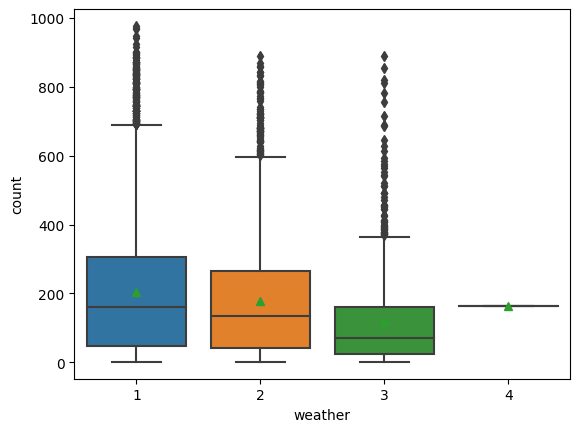

In [88]:
sns.boxplot(data = df, x = 'weather', y = 'count', showmeans = True)
plt.plot()

In [89]:
df_weather1 = df.loc[df['weather'] == 1]
df_weather2 = df.loc[df['weather'] == 2]
df_weather3 = df.loc[df['weather'] == 3]
df_weather4 = df.loc[df['weather'] == 4]
len(df_weather1), len(df_weather2), len(df_weather3), len(df_weather4)

(7192, 2834, 859, 1)

*STEP-1* : Set up Null Hypothesis

Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for weather 1, 2 and 3.
(We wont be considering weather 4 as there in only 1 data point for weather 4 and we cannot perform a ANOVA test with a single data point for a group)

Alternate Hypothesis ( HA ) -Mean of cycle rented per hour is not same for season 1,2,3 and 4 are different.
*STEP-2* : Checking for basic assumpitons for the hypothesis

Normality check using QQ Plot. If the distribution is not normal, use BOX-COX transform to transform it to normal distribution.

Homogeneity of Variances using Levene's test

Each observations are independent.

*STEP-3: Define Test statistics*

The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

F=MSB / MSW

Under H0, the test statistic should follow F-Distribution.

*STEP-4*: Decide the kind of test.

We will be performing right tailed f-test

*STEP-5: Compute the p-value* and fix value of alpha.

we will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set our alpha to be 0.05

*STEP-6*: Compare p-value and alpha.

Based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0
p-val < alpha : Reject H0

[]

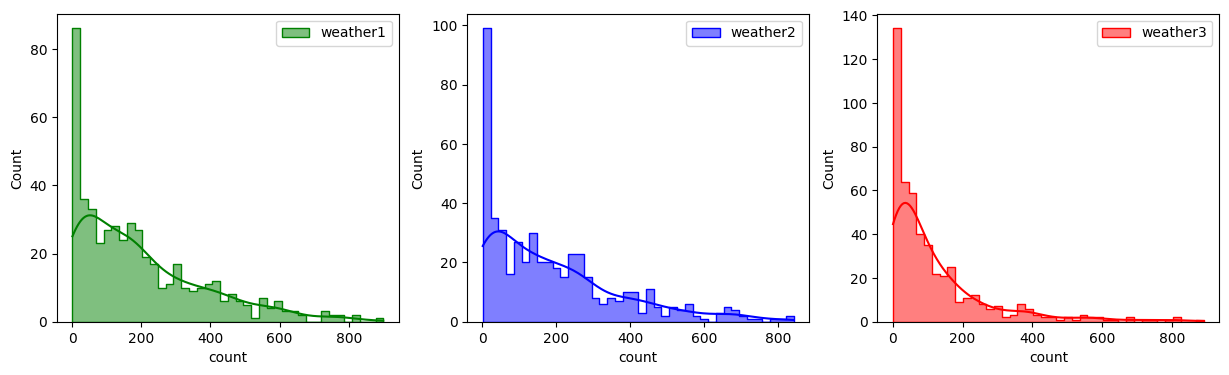

In [90]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 3, 1)
sns.histplot(df_weather1.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'green', kde = True, label = 'weather1')
plt.legend()
plt.subplot(1, 3, 2)
sns.histplot(df_weather2.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'blue', kde = True, label = 'weather2')
plt.legend()
plt.subplot(1, 3, 3)
sns.histplot(df_weather3.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'red', kde = True, label = 'weather3')
plt.legend()
plt.plot()

[]

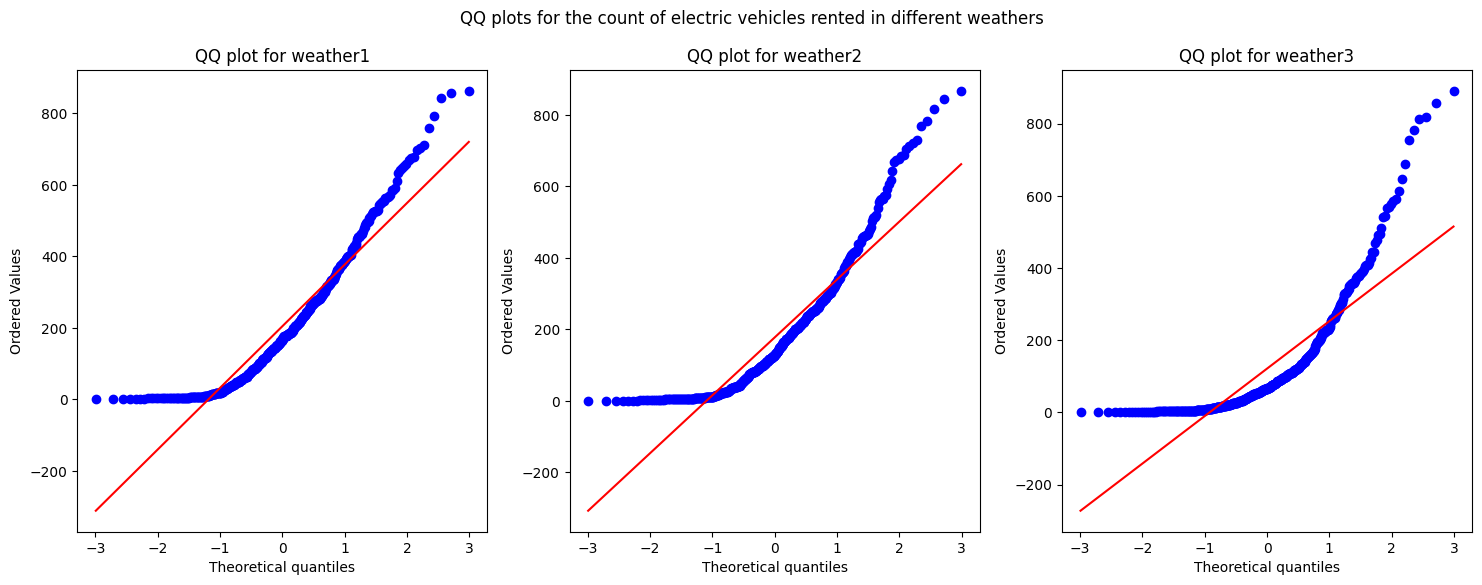

In [91]:
plt.figure(figsize = (18, 6))
plt.subplot(1, 3, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different weathers')
spy.probplot(df_weather1.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather1')
plt.subplot(1, 3, 2)
spy.probplot(df_weather2.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather2')
plt.subplot(1, 3, 3)
spy.probplot(df_weather3.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather3')
plt.plot()

It can be inferred from the above plot that the distributions do not follow normal distribution.

It can be seen from the above plots that the samples do not come from normal distribution.

Applying Shapiro-Wilk test for normality
 : The sample follows normal distribution
 : The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [92]:
test_stat, p_value = spy.shapiro(df_weather1.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.379953427296965e-20
The sample does not follow normal distribution


In [93]:
test_stat, p_value = spy.shapiro(df_weather2.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.2823790224489813e-18
The sample does not follow normal distribution


In [94]:
test_stat, p_value = spy.shapiro(df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.683319393734809e-27
The sample does not follow normal distribution


*Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.*

In [95]:
transformed_weather1 = spy.boxcox(df_weather1.loc[:, 'count'].sample(5000))[0]
test_stat, p_value = spy.shapiro(transformed_weather1)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.1306239146073322e-28
The sample does not follow normal distribution


In [96]:
transformed_weather2 = spy.boxcox(df_weather2.loc[:, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_weather2)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.9216098393369846e-19
The sample does not follow normal distribution


In [97]:
transformed_weather3 = spy.boxcox(df_weather3.loc[:, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_weather3)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.4133181593933841e-06
The sample does not follow normal distribution


Even after applying the boxcox transformation on each of the weather data, the samples do not follow normal distribution.

In [98]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df_weather1.loc[:, 'count'].sample(500),
                                df_weather2.loc[:, 'count'].sample(500),
                                df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 1.0557366694798849e-11
The samples do not have  Homogenous Variance


Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.

Therefore, the average number of rental bikes is statistically different for different weathers.

Is the number of cycles rented is similar or different in different season ?

In [100]:
df.groupby(by = 'season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [101]:
df_season_spring = df.loc[df['season'] == 'spring', 'count']
df_season_summer = df.loc[df['season'] == 'summer', 'count']
df_season_fall = df.loc[df['season'] == 'fall', 'count']
df_season_winter = df.loc[df['season'] == 'winter', 'count']
len(df_season_spring), len(df_season_summer), len(df_season_fall), len(df_season_winter)

(0, 0, 0, 0)

[]

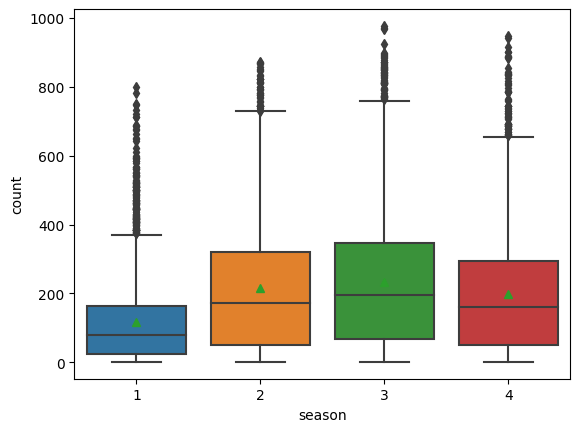

In [102]:
sns.boxplot(data = df, x = 'season', y = 'count', showmeans = True)
plt.plot()

STEP-1* : Set up Null Hypothesis

Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for season 1,2,3 and 4.

Alternate Hypothesis ( HA ) -Mean of cycle rented per hour is different for season 1,2,3 and 4.

*STEP-2* : Checking for basic assumpitons for the hypothesis

Normality check using QQ Plot. If the distribution is not normal, use BOX-COX transform to transform it to normal distribution.

Homogeneity of Variances using Levene's test

Each observations are independent.

*STEP-3*: Define Test statistics

The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

F=MSB/MSW

Under H0, the test statistic should follow F-Distribution.

*STEP-4*: Decide the kind of test.

We will be performing right tailed f-test

*STEP-5*: Compute the p-value and fix value of alpha.

we will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set our alpha to be 0.05

*STEP-6*: Compare p-value and alpha.

Based on p-value, we will accept or reject H0. p-val > alpha : Accept H0 p-val < alpha : Reject H0

The one-way ANOVA compares the means between the groups you are interested in and determines whether any of those means are statistically significantly different from each other.

Specifically, it tests the null hypothesis (H0):

*µ1 = µ2 = µ3 = ..... = µk*

where, µ = group mean and k = number of groups.

If, however, the one-way ANOVA returns a statistically significant result, we accept the alternative hypothesis (HA), which is that there are at least two group means that are statistically significantly different from each other.



[]

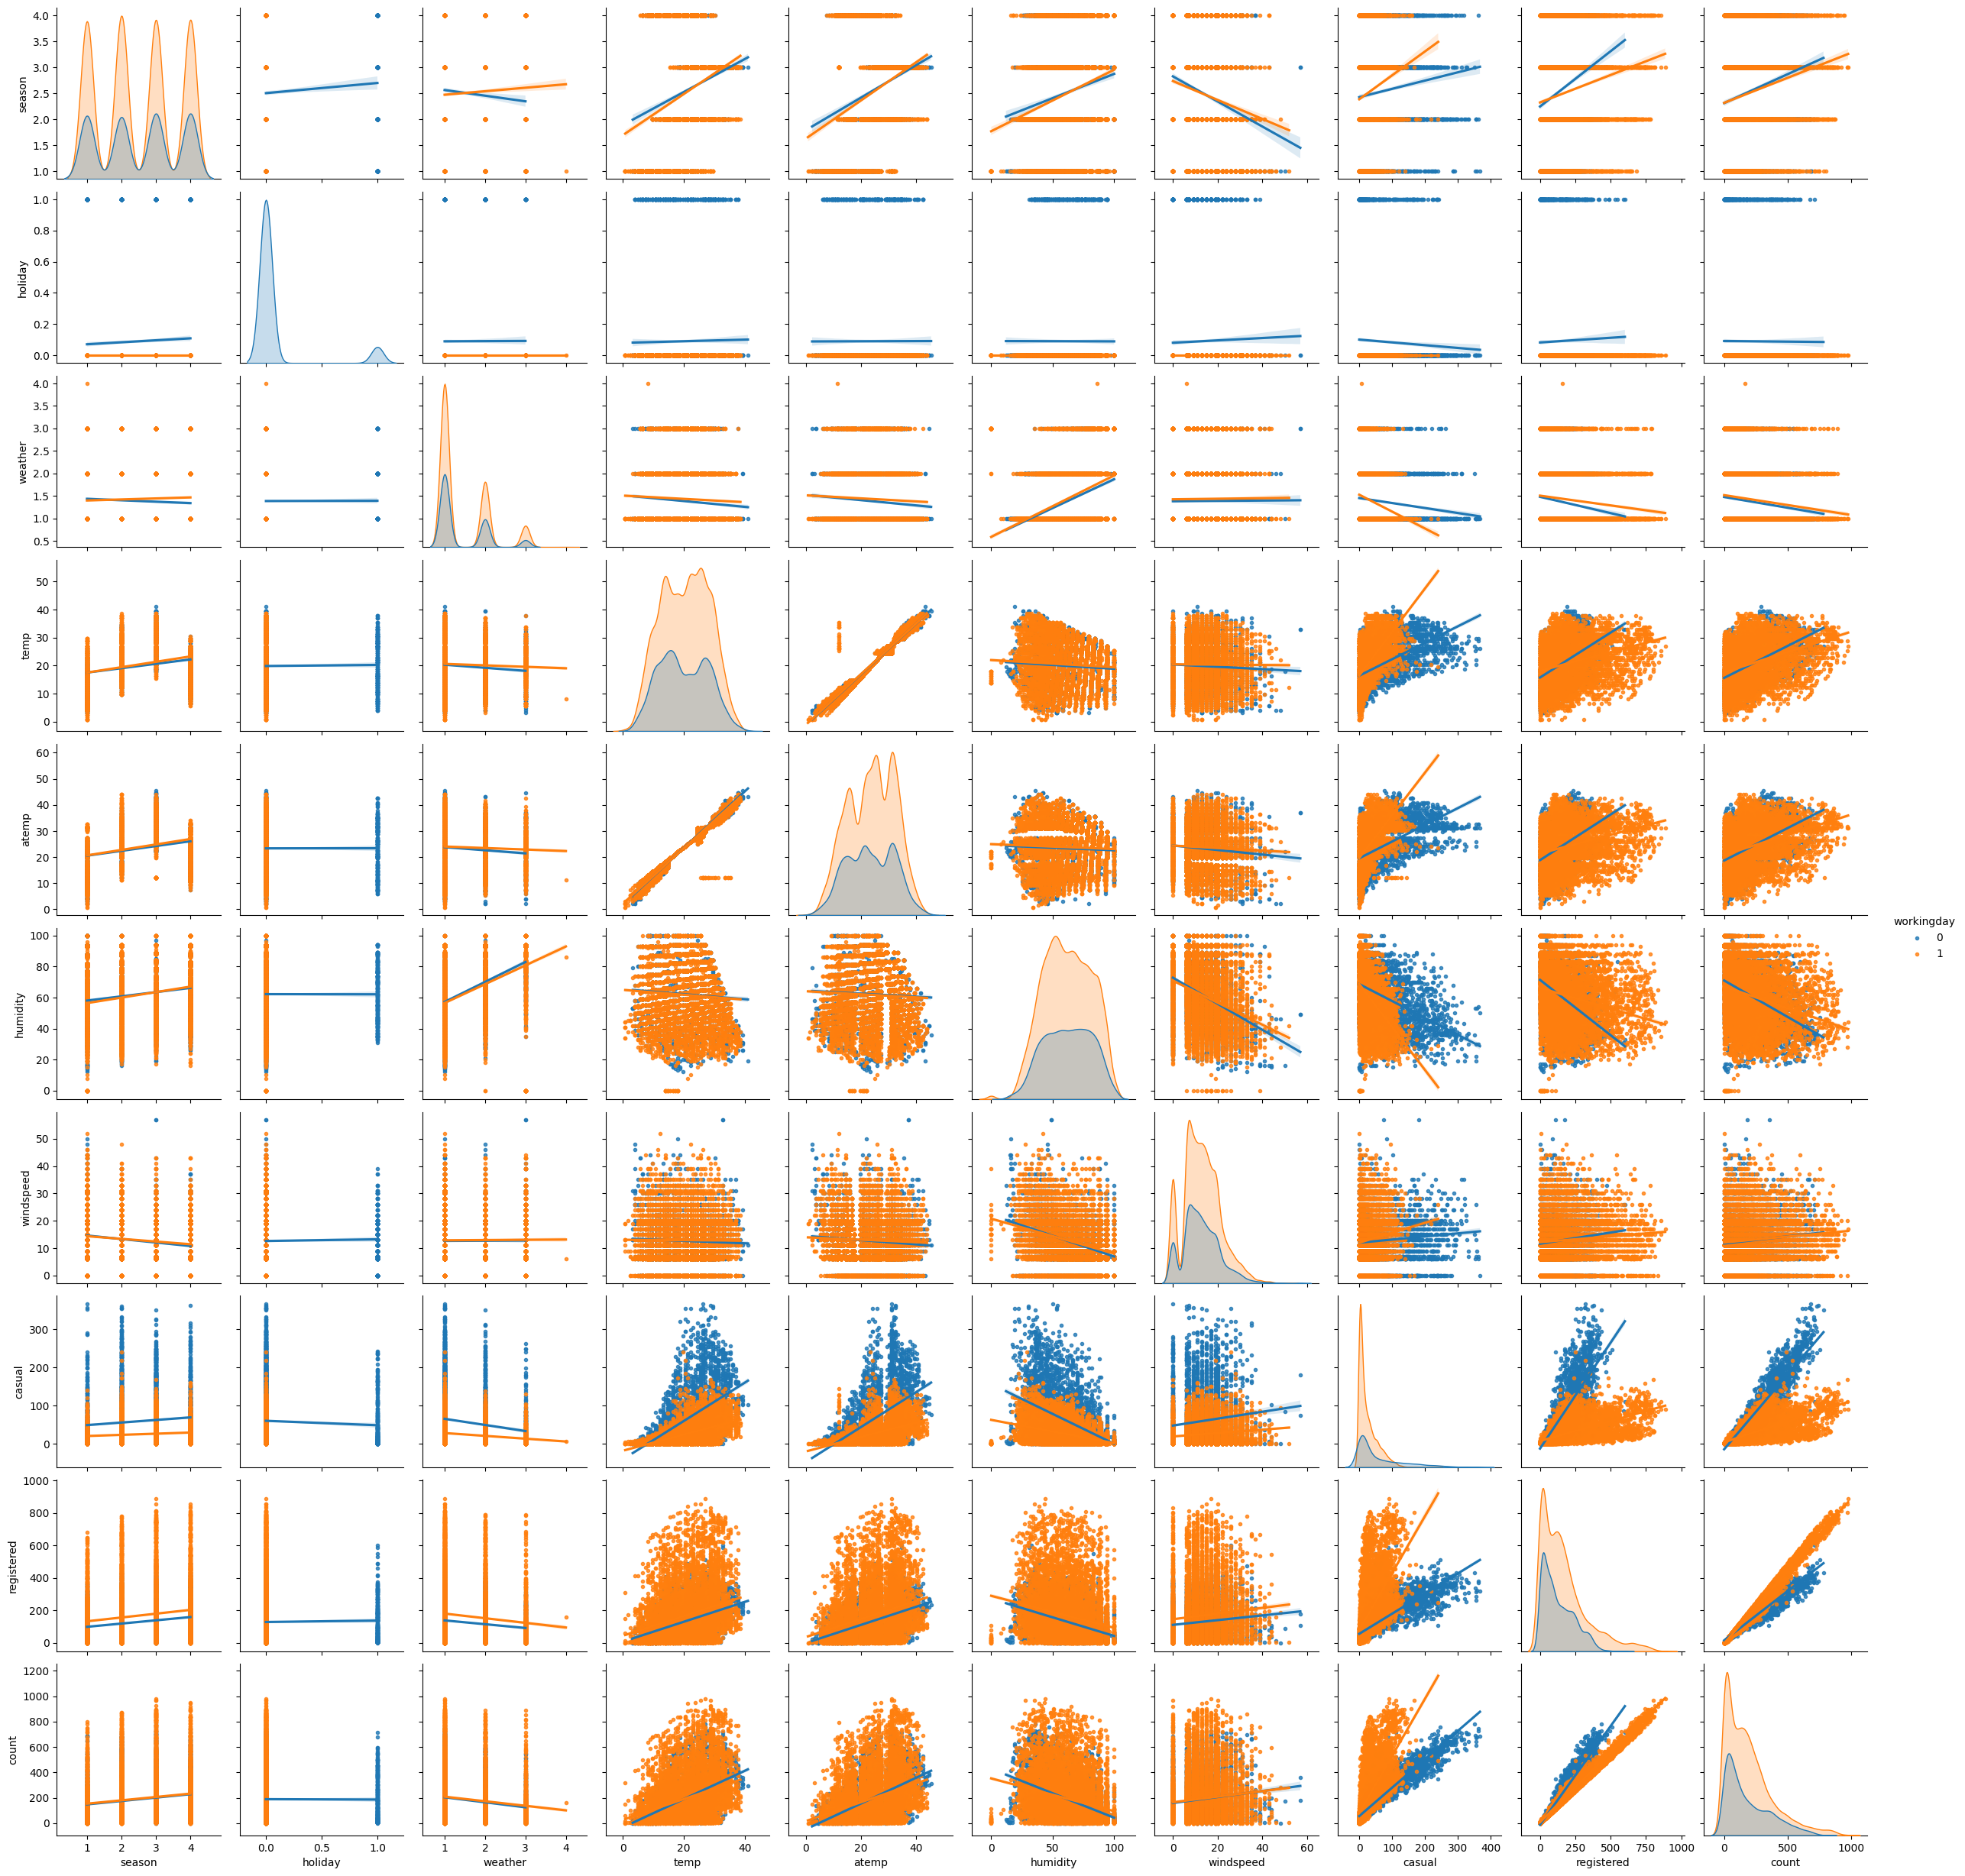

In [106]:
sns.pairplot(data = df,
             kind = 'reg',
             hue = 'workingday',
             markers = '.')
plt.plot()

In [107]:
corr_data = df.corr()
corr_data

<ipython-input-107-f9b45ce29f9e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data = df.corr()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


[]

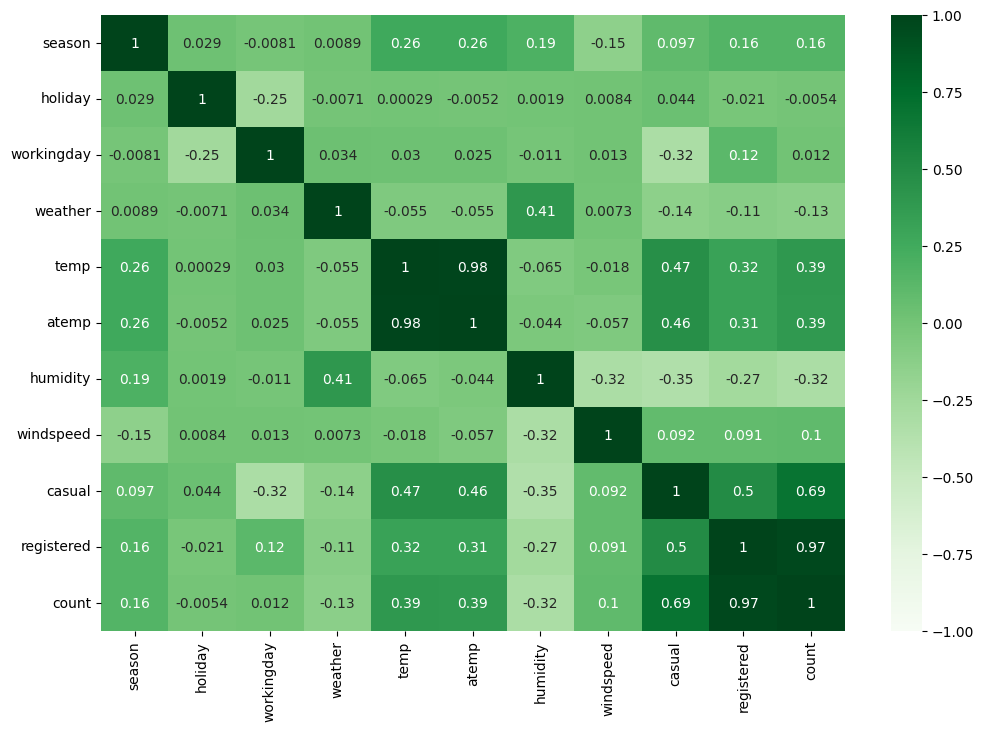

In [108]:
plt.figure(figsize = (12, 8))
sns.heatmap(data = corr_data, cmap = 'Greens', annot = True, vmin = -1, vmax = 1)
plt.plot()

Very High Correlation (> 0.9) exists between columns [atemp, temp] and [count, registered]

High positively / negatively correlation (0.7 - 0.9) does not exist between any columns.

Moderate positive correlation (0.5 - 0.7) exists between columns [casual, count], [casual, registered].

Low Positive correlation (0.3 - 0.5) exists between columns [count, temp], [count, atemp], [casual, atemp].

Negligible correlation exists between all other combinations of columns.

Insights

The data is given from Timestamp('2011-01-01 00:00:00') to Timestamp('2012-12-19 23:00:00'). The total time period for which the data is given is '718 days 23:00:00'.

Out of every 100 users, around 19 are casual users and 81 are registered users.

The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.

There is a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months.

The average hourly count of rental bikes is the lowest in the month of January followed by February and March.

There is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.

More than 80 % of the time, the temperature is less than 28 degrees celcius.

More than 80 % of the time, the humidity value is greater than 40.

Thus for most of the time, humidity level varies from optimum to too moist.

More than 85 % of the total, windspeed data has a value of less than 20.

The hourly count of total rental bikes is the highest in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.

The mean hourly count of the total rental bikes is statistically similar for both working and non- working days.

There is statistically significant dependency of weather and season based on the hourly total number of bikes rented.

The hourly total number of rental bikes is statistically different for different weathers.

There is no statistically significant dependency of weather 1, 2, 3 on season based on the average hourly total number of bikes rented.
The hourly total number of rental bikes is statistically different for different seasons.

Recommendations

Seasonal Marketing: Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.

Time-based Pricing: Take advantage of the hourly fluctuation in bike rental counts throughout the day. Consider implementing time-based pricing where rental rates are lower during off-peak hours and higher during peak hours. This can encourage customers to rent bikes during less busy times, balancing out the demand and optimizing the resources.

Weather-based Promotions: Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.

User Segmentation: Given that around 81% of users are registered, and the remaining 19% are casual, Yulu can tailor its marketing and communication strategies accordingly. Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.

Optimize Inventory: Analyze the demand patterns during different months and adjust the inventory accordingly. During months with lower rental counts such as January, February, and March, Yulu can optimize its inventory levels to avoid excess bikes. On the other hand, during peak months, ensure having sufficient bikes available to meet the higher demand.

Improve Weather Data Collection: Given the lack of records for extreme weather conditions, consider improving the data collection process for such scenarios. Having more data on extreme weather conditions can help to understand customer behavior and adjust the operations accordingly, such as offering specialized bike models for different weather conditions or implementing safety measures during extreme weather.

Customer Comfort: Since humidity levels are generally high and temperature is often below 28 degrees Celsius, consider providing amenities like umbrellas, rain jackets, or water bottles to enhance the comfort and convenience of the customers. These small touches can contribute to a positive customer experience and encourage repeat business.

Collaborations with Weather Services: Consider collaborating with weather services to provide real-time weather updates and forecasts to potential customers. Incorporate weather information into your marketing campaigns or rental app to showcase the ideal biking conditions and attract users who prefer certain weather conditions.

Seasonal Bike Maintenance: Allocate resources for seasonal bike maintenance. Before the peak seasons, conduct thorough maintenance checks on the bike fleet to ensure they are in top condition. Regularly inspect and service bikes throughout the year to prevent breakdowns and maximize customer satisfaction.

Customer Feedback and Reviews: Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.

Social Media Marketing: Leverage social media platforms to promote the electric bike rental services. Share captivating visuals of biking experiences in different weather conditions, highlight customer testimonials, and engage with potential customers through interactive posts and contests. Utilize targeted advertising campaigns to reach specific customer segments and drive more bookings.

Special Occasion Discounts: Since Yulu focusses on providing a sustainable solution for vehicular pollution, it should give special discounts on the occassions like Zero Emissions Day (21st September), Earth day (22nd April), World Environment Day (5th June) etc in order to attract new users.

